In [2]:
# Feature Selection Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load cleaned and preprocessed dataset
df = pd.read_csv("../data/processed/combine_preprocessed.csv")

# Define targets
target_classification = df['draft_round']
target_regression = df['draft_ovr']

# Drop ID and target columns (assumes 'pos' already encoded, and 'school' is retained)
features = df.drop(columns=[
    'draft_year', 'draft_round', 'draft_ovr'
])

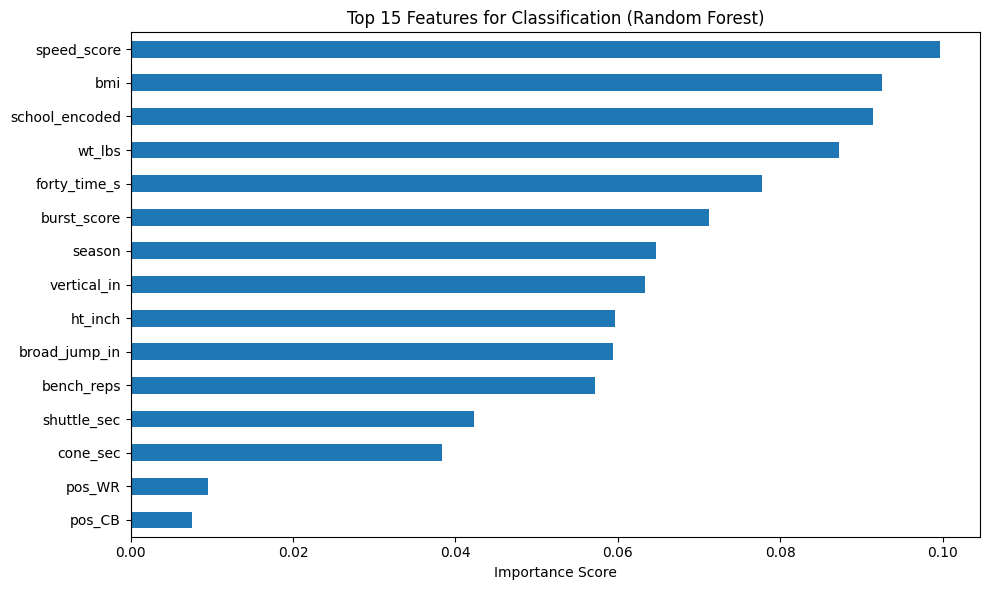

In [3]:
# ------------------------
# Feature Importance - Classification
# ------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(features, target_classification)
importances_clf = pd.Series(clf.feature_importances_, index=features.columns)

# Plot top features
plt.figure(figsize=(10, 6))
importances_clf.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Features for Classification (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

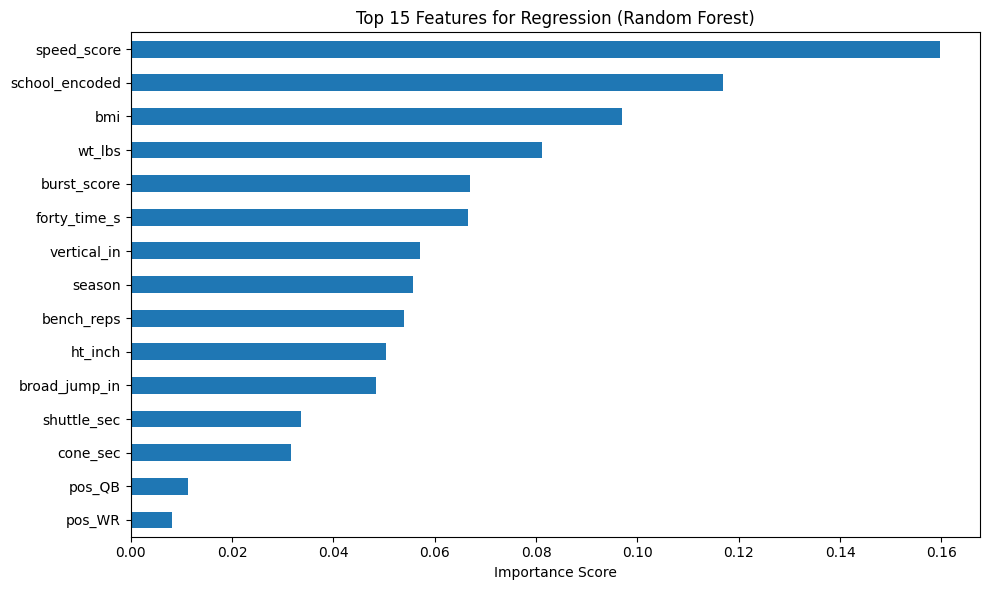

In [4]:
# ------------------------
# Feature Importance - Regression
# ------------------------
reg = RandomForestRegressor(random_state=42)
reg.fit(features, target_regression)
importances_reg = pd.Series(reg.feature_importances_, index=features.columns)

# Plot top features
plt.figure(figsize=(10, 6))
importances_reg.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Features for Regression (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
# Optionally save top features to CSV
importances_clf.sort_values(ascending=False).to_csv("../reports/feature_importance_classification.csv")
importances_reg.sort_values(ascending=False).to_csv("../reports/feature_importance_regression.csv")

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
features_encoded = features.copy()
categorical_cols = features.select_dtypes(include='object').columns

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    features_encoded[col] = le.fit_transform(features[col])
    le_dict[col] = le  # store encoders


In [10]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Targets
y_class = df['draft_round']
y_reg = df['draft_ovr']

# Mutual Information - Classification
mi_classif = mutual_info_classif(features_encoded, y_class, discrete_features='auto')
mi_classif_scores = pd.Series(mi_classif, index=features_encoded.columns).sort_values(ascending=False)

# Mutual Information - Regression
mi_reg = mutual_info_regression(features_encoded, y_reg, discrete_features='auto')
mi_reg_scores = pd.Series(mi_reg, index=features_encoded.columns).sort_values(ascending=False)

# Save to CSV
mi_classif_scores.to_csv("data/eda/mutual_info_classification.csv", header=["mutual_info_score"])
mi_reg_scores.to_csv("data/eda/mutual_info_regression.csv", header=["mutual_info_score"])

# Plot Classification MI
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_classif_scores.values, y=mi_classif_scores.index, palette="viridis")
plt.title("Top Features by Mutual Information (Classification - draft_round)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("assets/eda/mutual_info_classification.png")
plt.show()

# Plot Regression MI
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_reg_scores.values, y=mi_reg_scores.index, palette="rocket")
plt.title("Top Features by Mutual Information (Regression - draft_ovr)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("assets/eda/mutual_info_regression.png")
plt.show()

ValueError: Input X contains NaN.